In [1]:
import pandas as pd
import seaborn as sns

In [5]:
from ydata_profiling import ProfileReport

In [2]:
from pycaret.time_series import TSForecastingExperiment

Datahack URL: https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

In [3]:
train = pd.read_csv('Train.csv')

In [4]:
test = pd.read_csv('Test.csv')

In [7]:
ProfileReport(df=train, tsmode=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
test.shape

(5112, 2)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [7]:
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


<AxesSubplot: >

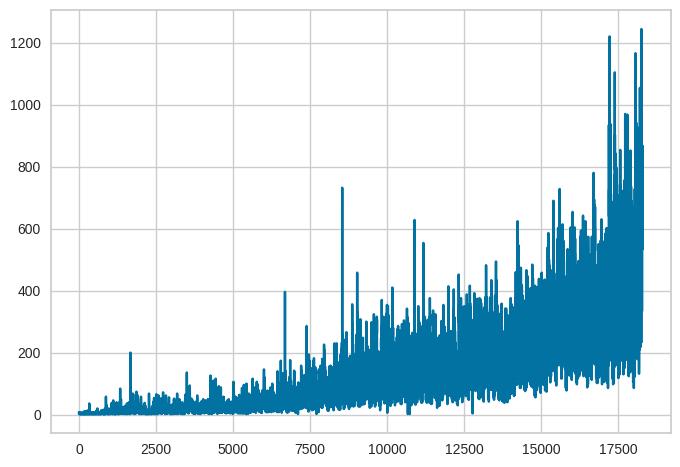

In [8]:
train['Count'].plot()

In [9]:
exp = TSForecastingExperiment()

In [10]:
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [11]:
exp.setup(train['Count'], fh=240)

,Description,Value
0,session_id,3750
1,Target,Count
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(18288, 1)"
5,Transformed data shape,"(18288, 1)"
6,Transformed train set shape,"(18048, 1)"
7,Transformed test set shape,"(240, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [12]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,18288.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,138.958115
3,Summary,Statistics,Transformed,Median,,84.0
4,Summary,Statistics,Transformed,Standard Deviation,,153.467461
5,Summary,Statistics,Transformed,Variance,,23552.261602
6,Summary,Statistics,Transformed,Kurtosis,,3.9118
7,Summary,Statistics,Transformed,Skewness,,1.757135
8,Summary,Statistics,Transformed,# Distinct Values,,437.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",256979.314239


In [13]:
exp.models(internal=False)

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


In [14]:
exp.get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mase,MASE,MASE,<function mase at 0x7f75bf0469e0>,"make_scorer(mase, greater_is_better=False)",pred,{},False,False
rmsse,RMSSE,RMSSE,<function rmsse at 0x7f75bf046a70>,"make_scorer(rmsse, greater_is_better=False)",pred,{},False,False
mae,MAE,MAE,<function mean_absolute_error at 0x7f75c0278f70>,neg_mean_absolute_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x7f75c0279120>,neg_root_mean_squared_error,pred,{'squared': False},False,False
mape,MAPE,MAPE,<function mape at 0x7f75bf0460e0>,"make_scorer(mape, greater_is_better=False)",pred,{},False,False
smape,SMAPE,SMAPE,<function _smape_loss at 0x7f75bf21b490>,"make_scorer(_smape_loss, greater_is_better=False)",pred,{},False,False
r2,R2,R2,<function r2_score at 0x7f75c02793f0>,r2,pred,{},True,False


In [15]:
exp.compare_models(exclude=['auto_arima'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,3.1974,2.4982,126.1676,169.5873,0.2926,0.3072,0.1600,3.0300
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,3.3393,2.4367,131.9029,165.4768,0.3668,0.3307,0.2022,10.5333
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,3.4288,2.5357,135.4341,172.2031,0.3549,0.3361,0.1368,7.5367
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,3.5091,2.6546,139.1286,181.2370,0.3805,0.3420,0.0037,2.8067
theta,Theta Forecaster,3.5669,2.6668,140.6350,180.9421,0.3749,0.3498,0.0425,0.0400
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,3.5799,2.6636,141.5626,181.0632,0.3661,0.3500,0.0433,2.8900
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize & Detrending,3.5799,2.6636,141.5626,181.0632,0.3661,0.3500,0.0433,2.8900
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,3.5799,2.6636,141.5626,181.0632,0.3661,0.3500,0.0433,2.8000
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,3.5800,2.6635,141.5645,181.0620,0.3661,0.3500,0.0433,2.6767
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,3.5804,2.6634,141.5820,181.0549,0.3663,0.3501,0.0434,3.0367


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [24, 23,
                                                                        22, 21,
                                                                        20, 19,
                                                                        18, 17,
                                                                        16, 15,
                                                                        14, 13,
                                                                        12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=KNeighborsRegressor(n_jobs=-1), sp=24,
                    window_length=24)

In [47]:
exp.compare_models(exclude=['auto_arima'])

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,2.5364,1.7713,108.2957,131.1920,0.1736,0.1716,0.7224,0.6500
ets,ETS,2.7054,1.9696,115.4767,145.7783,0.1796,0.1812,0.6754,6.0367
theta,Theta Forecaster,3.1054,2.3435,132.5181,173.3953,0.1893,0.2047,0.5410,0.0333
arima,ARIMA,3.3987,2.5839,144.9010,190.9605,0.2144,0.2449,0.3626,1.5133
snaive,Seasonal Naive Forecaster,3.5650,2.6226,151.9722,193.7915,0.2343,0.2754,0.3266,0.5800
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,3.5948,2.5050,153.3341,185.2676,0.3203,0.2794,0.4333,1.4367
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,4.2622,3.1168,181.7410,230.3834,0.2657,0.3044,0.1021,0.4633
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,4.2939,3.1007,183.1048,229.2108,0.2752,0.3084,0.1236,0.3567
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,4.2939,3.1006,183.1049,229.2089,0.2752,0.3084,0.1236,0.4433
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,4.2939,3.1006,183.1049,229.2089,0.2752,0.3084,0.1236,0.3967


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

ExponentialSmoothing(seasonal='mul', sp=24, trend='add')

In [16]:
exp.create_model(estimator='knn_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,17327.0000,3.9240,3.1889,151.1474,211.5106,0.3151,0.3641,-0.0780
1,17567.0000,2.9356,2.3284,116.2023,158.8595,0.2415,0.2618,0.1716
2,17807.0000,2.7325,1.9773,111.1531,138.3918,0.3211,0.2958,0.3866
Mean,nan,3.1974,2.4982,126.1676,169.5873,0.2926,0.3072,0.1600
SD,nan,0.5205,0.5090,17.7832,30.7994,0.0362,0.0425,0.1899


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [24, 23,
                                                                        22, 21,
                                                                        20, 19,
                                                                        18, 17,
                                                                        16, 15,
                                                                        14, 13,
                                                                        12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=KNeighborsRegressor(n_jobs=-1), sp=24,
                    window_length=24)

In [17]:
knn = exp.create_model(estimator='knn_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,17327.0000,3.9240,3.1889,151.1474,211.5106,0.3151,0.3641,-0.0780
1,17567.0000,2.9356,2.3284,116.2023,158.8595,0.2415,0.2618,0.1716
2,17807.0000,2.7325,1.9773,111.1531,138.3918,0.3211,0.2958,0.3866
Mean,nan,3.1974,2.4982,126.1676,169.5873,0.2926,0.3072,0.1600
SD,nan,0.5205,0.5090,17.7832,30.7994,0.0362,0.0425,0.1899


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
pred = exp.predict_model(knn, fh=5112+24)

In [19]:
pred

,y_pred
18048,426.9129
18049,320.7098
18050,283.0016
18051,237.3864
18052,196.4479
...,...
23179,565.2887
23180,552.7606
23181,530.1913
23182,523.0594


In [106]:
pred[24:]

,y_pred
18072,394.0627
18073,301.1207
18074,251.5207
18075,222.8067
18076,176.8067
...,...
23179,565.2887
23180,552.7606
23181,530.1913
23182,523.0594


In [107]:
submission = pd.DataFrame({'ID':test['ID'].values, 'Count': pred['y_pred'][24:].values})

In [108]:
submission.to_csv('submission.csv', index=False)